# What makes pokemon legendary

This project consists of various tasks which will be in different fields. First thing is we have only dataset of ~800 pokemons. As we may remember 1st generation pokemons are quite simple but further ones are more or less unknown. So we need to focus on analyzing this dataset to gather insights and move on to other stage. Next phase is about prediction to actually see if we can predict if pokemon with list of given attribute values can be legendary. Moving on we would like to gather our knowledge and create dashboard with couple graphs. Last but not least is creating web app to combine dashboard and use of trained model so anyone can play with it. 

## List of tasks
1. Analysis
    1. Number of Legendary Pokemons
    2. Analysing Legendary Pokemons by height, type, weight and fightning stats
    3. Creating datasets for training and testing
2. Prediction
    1. Choosing model
    2. Fit model
    3. Analyzing variable importance
    4. Conclusion
3. Dashboard
    1. Dash app
    2. Creating graphs with plotly which will be used in app
4. Web App
    1. Combining dash app with prediction model
    2. Frontend modifications
    3. Deployment on server (maybe)

## 1. Introduction
First we need to prepare our environment so let's start with importing libraries and our dataset

Libraries

In [18]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from ipywidgets import widgets

## Number of Legendary Pokemons

In [2]:
pokemon_dataset = pd.read_csv('pokemon.csv')

In [3]:
pokemon_dataset.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
pokemon_dataset.keys()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
pokemon_dataset['name'].head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: name, dtype: object

In [6]:
pokemon_dataset['type1'].head()

0    grass
1    grass
2    grass
3     fire
4     fire
Name: type1, dtype: object

In [7]:
pokemon_dataset_val_count = pokemon_dataset['type1'].value_counts()
pokemon_dataset_val_count

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

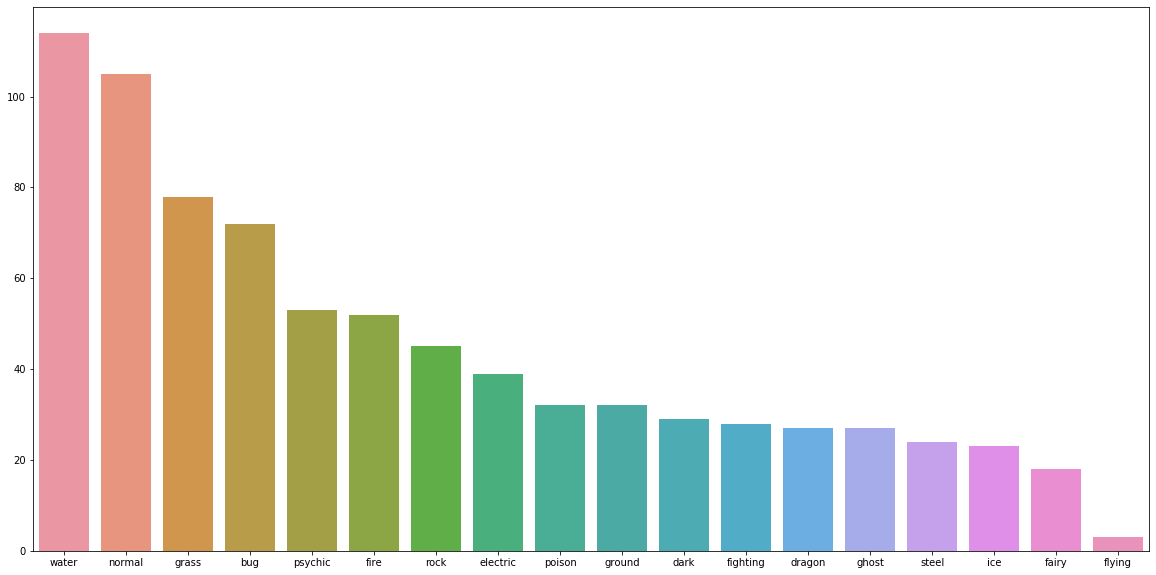

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x = pokemon_dataset_val_count.index, y = pokemon_dataset_val_count.values)

Okay so we've seen couple of basic things. Let's search for legendaries pokemon now

In [9]:
pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
143,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,NaN,144,95,125,85,ice,flying,55.4,1,1
144,"['Pressure', 'Static']",0.50,1.0,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,NaN,145,125,90,100,electric,flying,52.6,1,1
145,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1
149,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1
150,['Synchronize'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,151,100,100,100,psychic,NaN,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [10]:
len(pokemon_dataset)

801

In [12]:
70/801*100

8.739076154806492

Legendaries are 8.74% of this pokemon dataset. Quite unbalanced dataset. Now let's try to search for any similarities between non-legendaries and legendaries 

## Analysing Legendary Pokemons by height, type, weight and fightning stats

In [16]:
fig = go.Figure(data=[go.Scatter(x=pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,'attack'],
                                y=pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,'defense'], mode='markers')])
fig.show()

In [17]:
fig = go.Figure(data=[go.Scatter(x=pokemon_dataset.loc[pokemon_dataset['is_legendary']==0,'attack'],
                                y=pokemon_dataset.loc[pokemon_dataset['is_legendary']==0,'defense'], mode='markers')])
fig.show()

There are many attributes we can compare to so it can be tiring to make graph for every combination. Maybe there is a way to make one graph and just click what attributes to compare.

In [39]:
attributeFirst = widgets.Dropdown(
    options=list(pokemon_dataset.keys()),
    value='attack',
    description='First Attribute:',
)

attributeSecond = widgets.Dropdown(
    options=list(pokemon_dataset.keys()),
    value='defense',
    description='Second Attribute:',
)

In [40]:
def validate():
    if attributeFirst.value in pokemon_dataset.keys().unique() and attributeSecond.value in pokemon_dataset.keys():
        return True
    else:
        return False

def response(change):
    if validate():
        
        temp_df_non_legendaries = pokemon_dataset.loc[pokemon_dataset['is_legendary']==0,
                                                    [attributeFirst.value,attributeSecond.value]]
        
        temp_df_legendaries = pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,
                                                    [attributeFirst.value,attributeSecond.value]]
        
        x1 = temp_df_non_legendaries[attributeFirst.value]
        y1 = temp_df_non_legendaries[attributeSecond.value]
        
        x2 = temp_df_legendaries[attributeFirst.value]
        y2 = temp_df_legendaries[attributeSecond.value]
        
        with g.batch_update():
            g.data[0].x = x1
            g.data[0].y = y1
            g.data[1].x = x2
            g.data[1].y = y2
            g.layout.xaxis.title = attributeFirst.value
            g.layout.yaxis.title = attributeSecond.value

attributeFirst.observe(response,names='value')
attributeSecond.observe(response,names='value')

In [41]:
trace1 = go.Scatter(x=pokemon_dataset.loc[pokemon_dataset['is_legendary']==0,'attack'],
                    y=pokemon_dataset.loc[pokemon_dataset['is_legendary']==0,'defense'],
                    opacity=0.75, name='Non-legendaries',mode='markers')

trace2 = go.Scatter(x=pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,'attack'],
                    y=pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,'defense'],
                    opacity=0.75, name='Legendaries',mode='markers')

g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='Legendaries vs non-legendaries',
                            
                        ),
                        xaxis_title = attributeFirst.value,
                        yaxis_title = attributeSecond.value
                    ))

container = widgets.HBox([attributeFirst,attributeSecond])
widgets.VBox([container,g])

That will help us save a lot of time and space. Now we don't need to think about creating graph for every combination of features. Couple of tries and we still can have a trouble finding good features tuple to separate non-legendaries from legendaries. Next step is to create a heatmap to find coorelations.  

In [49]:
pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,
                                                    ['attack','defense']]

,attack,defense
143,85,100
144,90,85
145,100,90
149,150,70
150,100,100
...,...,...
796,101,103
797,181,131
798,101,53
799,107,101


In [54]:
pokemon_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [62]:
list_of_numeric_features = list(pokemon_dataset.keys())
list_of_numeric_features = [x for x in list_of_numeric_features if x not in ['name', 'japanese_name','capture_rate','classfication','abilities','type1','type2']]

In [63]:
list_of_numeric_features

['against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'percentage_male',
 'pokedex_number',
 'sp_attack',
 'sp_defense',
 'speed',
 'weight_kg',
 'generation',
 'is_legendary']

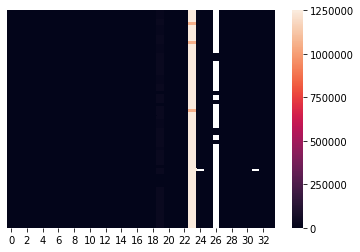

In [70]:
df_heat = pokemon_dataset.loc[pokemon_dataset['is_legendary']==1,
                                                    list_of_numeric_features]
sns.heatmap(df_heat.values, xticklabels=2, yticklabels=False)

To do >>heatmap